In [24]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [25]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [26]:
NUM_CLASSES = 4

# Dataset reading

In [27]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [28]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [31]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,114 (4.35 KB)

 Trainable params: 1,114 (4.35 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
import tensorflow as tf

# Define your model save path ending with .keras
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_save_path, 
    verbose=1, 
    save_weights_only=False
)

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [33]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [34]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2838 - loss: 1.3902   
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2843 - loss: 1.3885 - val_accuracy: 0.3150 - val_loss: 1.2760
Epoch 2/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3438 - loss: 1.3141
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3512 - loss: 1.2921 - val_accuracy: 0.4002 - val_loss: 1.1980
Epoch 3/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3125 - loss: 1.2558
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3701 - loss: 1.2393 - val_accuracy: 0.4495 - val_loss: 1.1437
Epoch 4/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4297 - loss: 1.1977
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [35]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9710 - loss: 0.1817 


In [36]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [37]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[9.6328163e-01 3.6375679e-02 2.7277455e-04 7.0003734e-05]
0


# Confusion matrix

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


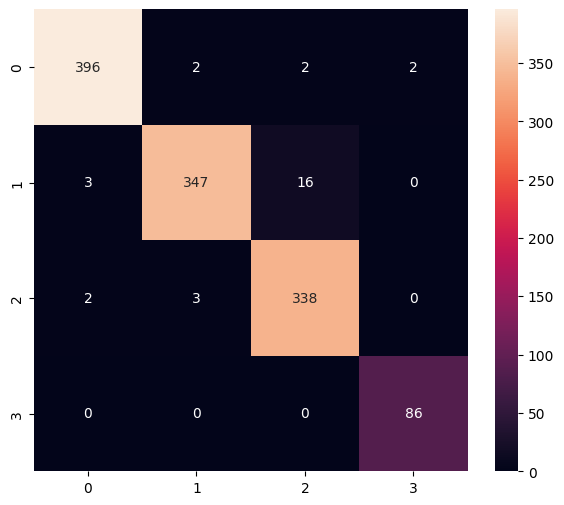

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       402
           1       0.99      0.95      0.97       366
           2       0.95      0.99      0.97       343
           3       0.98      1.00      0.99        86

    accuracy                           0.97      1197
   macro avg       0.98      0.98      0.98      1197
weighted avg       0.98      0.97      0.97      1197



In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [39]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [40]:
import tensorflow as tf

# Assuming 'model' is your Keras Sequential model
model = tf.keras.Sequential([
    # Define your layers here
])

try:
    # Convert the model to a TensorFlow Lite model
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
    tflite_quantized_model = converter.convert()

    # Save the quantized model to a file
    tflite_save_path = 'model/keypoint_classifier/keypoint_classifier_quantized.tflite'
    with open(tflite_save_path, 'wb') as f:
        f.write(tflite_quantized_model)

except Exception as e:
    print("Error occurred during conversion:", e)
    # Optionally, print more debug information if available
    if hasattr(converter, '_debug_info'):
        print("Converter debug info:", converter._debug_info)


INFO:tensorflow:Assets written to: C:\Users\Mayur\AppData\Local\Temp\tmphaor_ula\assets


INFO:tensorflow:Assets written to: C:\Users\Mayur\AppData\Local\Temp\tmphaor_ula\assets


Error occurred during conversion: Could not translate MLIR to FlatBuffer.
Converter debug info: files: "<frozen runpy>"
files: "C:\\Users\\Mayur\\AppData\\Roaming\\Python\\Python312\\site-packages\\ipykernel_launcher.py"
files: "C:\\Users\\Mayur\\AppData\\Roaming\\Python\\Python312\\site-packages\\traitlets\\config\\application.py"
files: "C:\\Users\\Mayur\\AppData\\Roaming\\Python\\Python312\\site-packages\\ipykernel\\kernelapp.py"
files: "C:\\Users\\Mayur\\AppData\\Roaming\\Python\\Python312\\site-packages\\tornado\\platform\\asyncio.py"
files: "c:\\Users\\Mayur\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\asyncio\\base_events.py"
files: "c:\\Users\\Mayur\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\asyncio\\events.py"
files: "C:\\Users\\Mayur\\AppData\\Roaming\\Python\\Python312\\site-packages\\ipykernel\\kernelbase.py"
files: "C:\\Users\\Mayur\\AppData\\Roaming\\Python\\Python312\\site-packages\\ipykernel\\ipkernel.py"
files: "C:\\Users\\Mayur\\AppData\\Roaming\\Python\

# Inference test

In [41]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [42]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [43]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [44]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [45]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.8105639e-01 1.8674180e-02 2.2328256e-04 4.6191886e-05]
0
